<a href="https://colab.research.google.com/github/Virajkd/ECE-curriculum-analysis-for-colleges/blob/main/Code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import networkx as nx
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [ ]:
file_name = '/content/drive/MyDrive/Crowd_management/ECE_final.xlsx'
df = pd.read_excel(file_name)

In [ ]:
# Load the data from a single Excel sheet
data1 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet1')  # Replace 'Sheet1' with your actual sheet name
data2 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet2')  # Replace 'Sheet2' with your actual sheet name
data3 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet3')  # Replace 'Sheet3' with your actual sheet name
data4 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet4')  # Replace 'Sheet4' with your actual sheet name
data5 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet5')  # Replace 'Sheet5' with your actual sheet name
data6 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet6')  # Replace 'Sheet6' with your actual sheet name
data7 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet7')  # Replace 'Sheet7' with your actual sheet name
data8 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet8')  # Replace 'Sheet8' with your actual sheet name

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], ignore_index=True)

Course Offerings by University

<ipython-input-6-c4e3bc0a55db>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=course_count, x='Offered by', y='Subject', palette=palette)


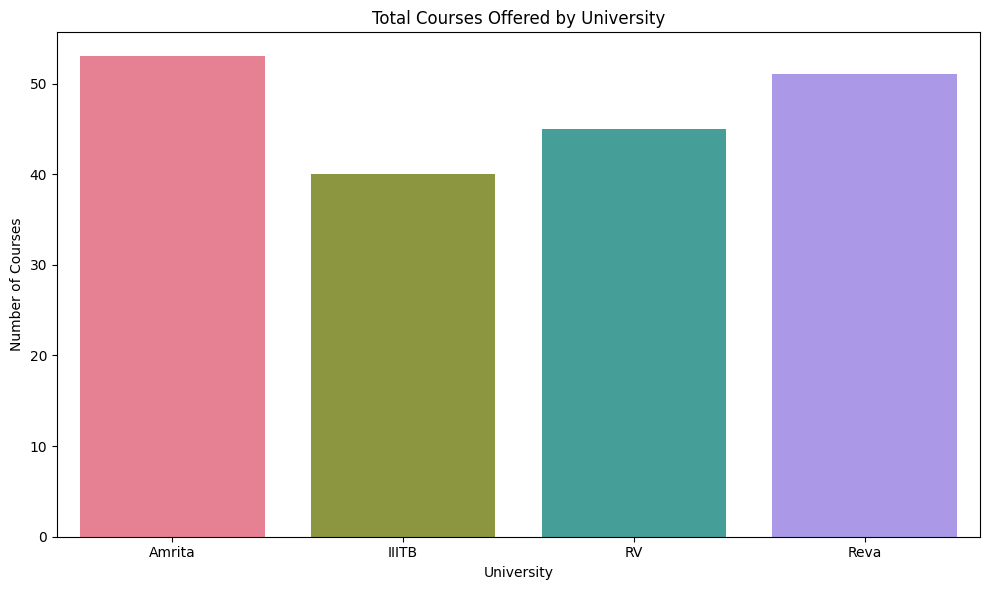

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your course data
# data = pd.read_csv('course_data.csv')

# Count total courses offered by each university
course_count = data.groupby('Offered by')['Subject'].nunique().reset_index()

# Plotting course offerings with multiple colors
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(course_count))  # Generate a palette with a unique color for each university
sns.barplot(data=course_count, x='Offered by', y='Subject', palette=palette)

plt.title('Total Courses Offered by University')
plt.xlabel('University')
plt.ylabel('Number of Courses')
plt.tight_layout()
plt.show()


Elective Course Analysis


<ipython-input-7-b31e61e23353>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=elective_count, x='Offered by', y='Subject', palette=palette)


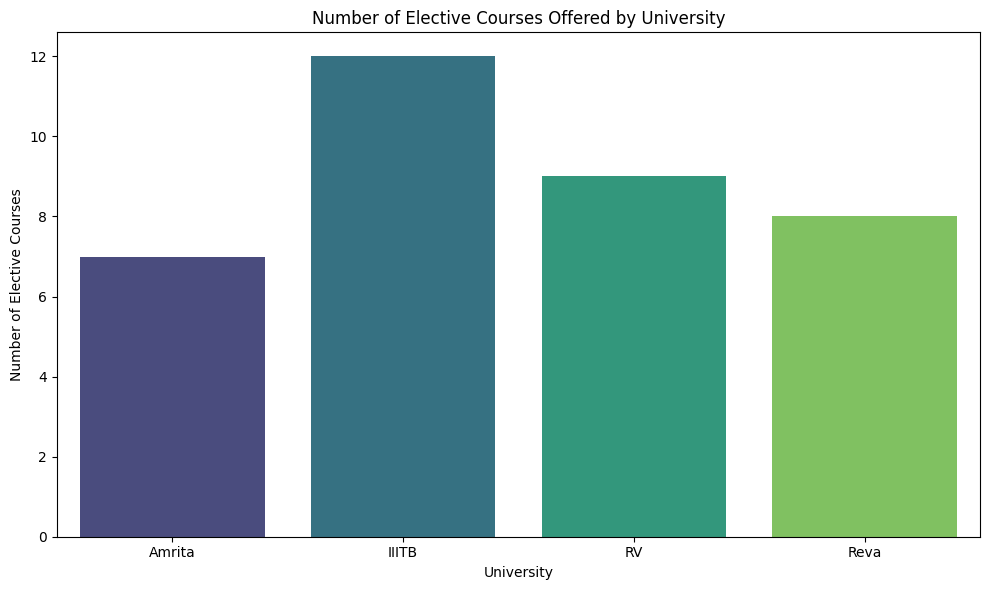

In [ ]:
# Count elective courses offered by each university
elective_count = data[data['Core/Prof Elective'] == 'Elective'].groupby('Offered by')['Subject'].nunique().reset_index()

# Plotting elective course offerings with multiple colors
plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", len(elective_count))  # Using the "viridis" palette for unique colors
sns.barplot(data=elective_count, x='Offered by', y='Subject', palette=palette)

plt.title('Number of Elective Courses Offered by University')
plt.xlabel('University')
plt.ylabel('Number of Elective Courses')
plt.tight_layout()
plt.show()


Course Frequency

<ipython-input-9-97246c3f457d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=course_frequency, x='Subject', y='frequency', palette=palette)


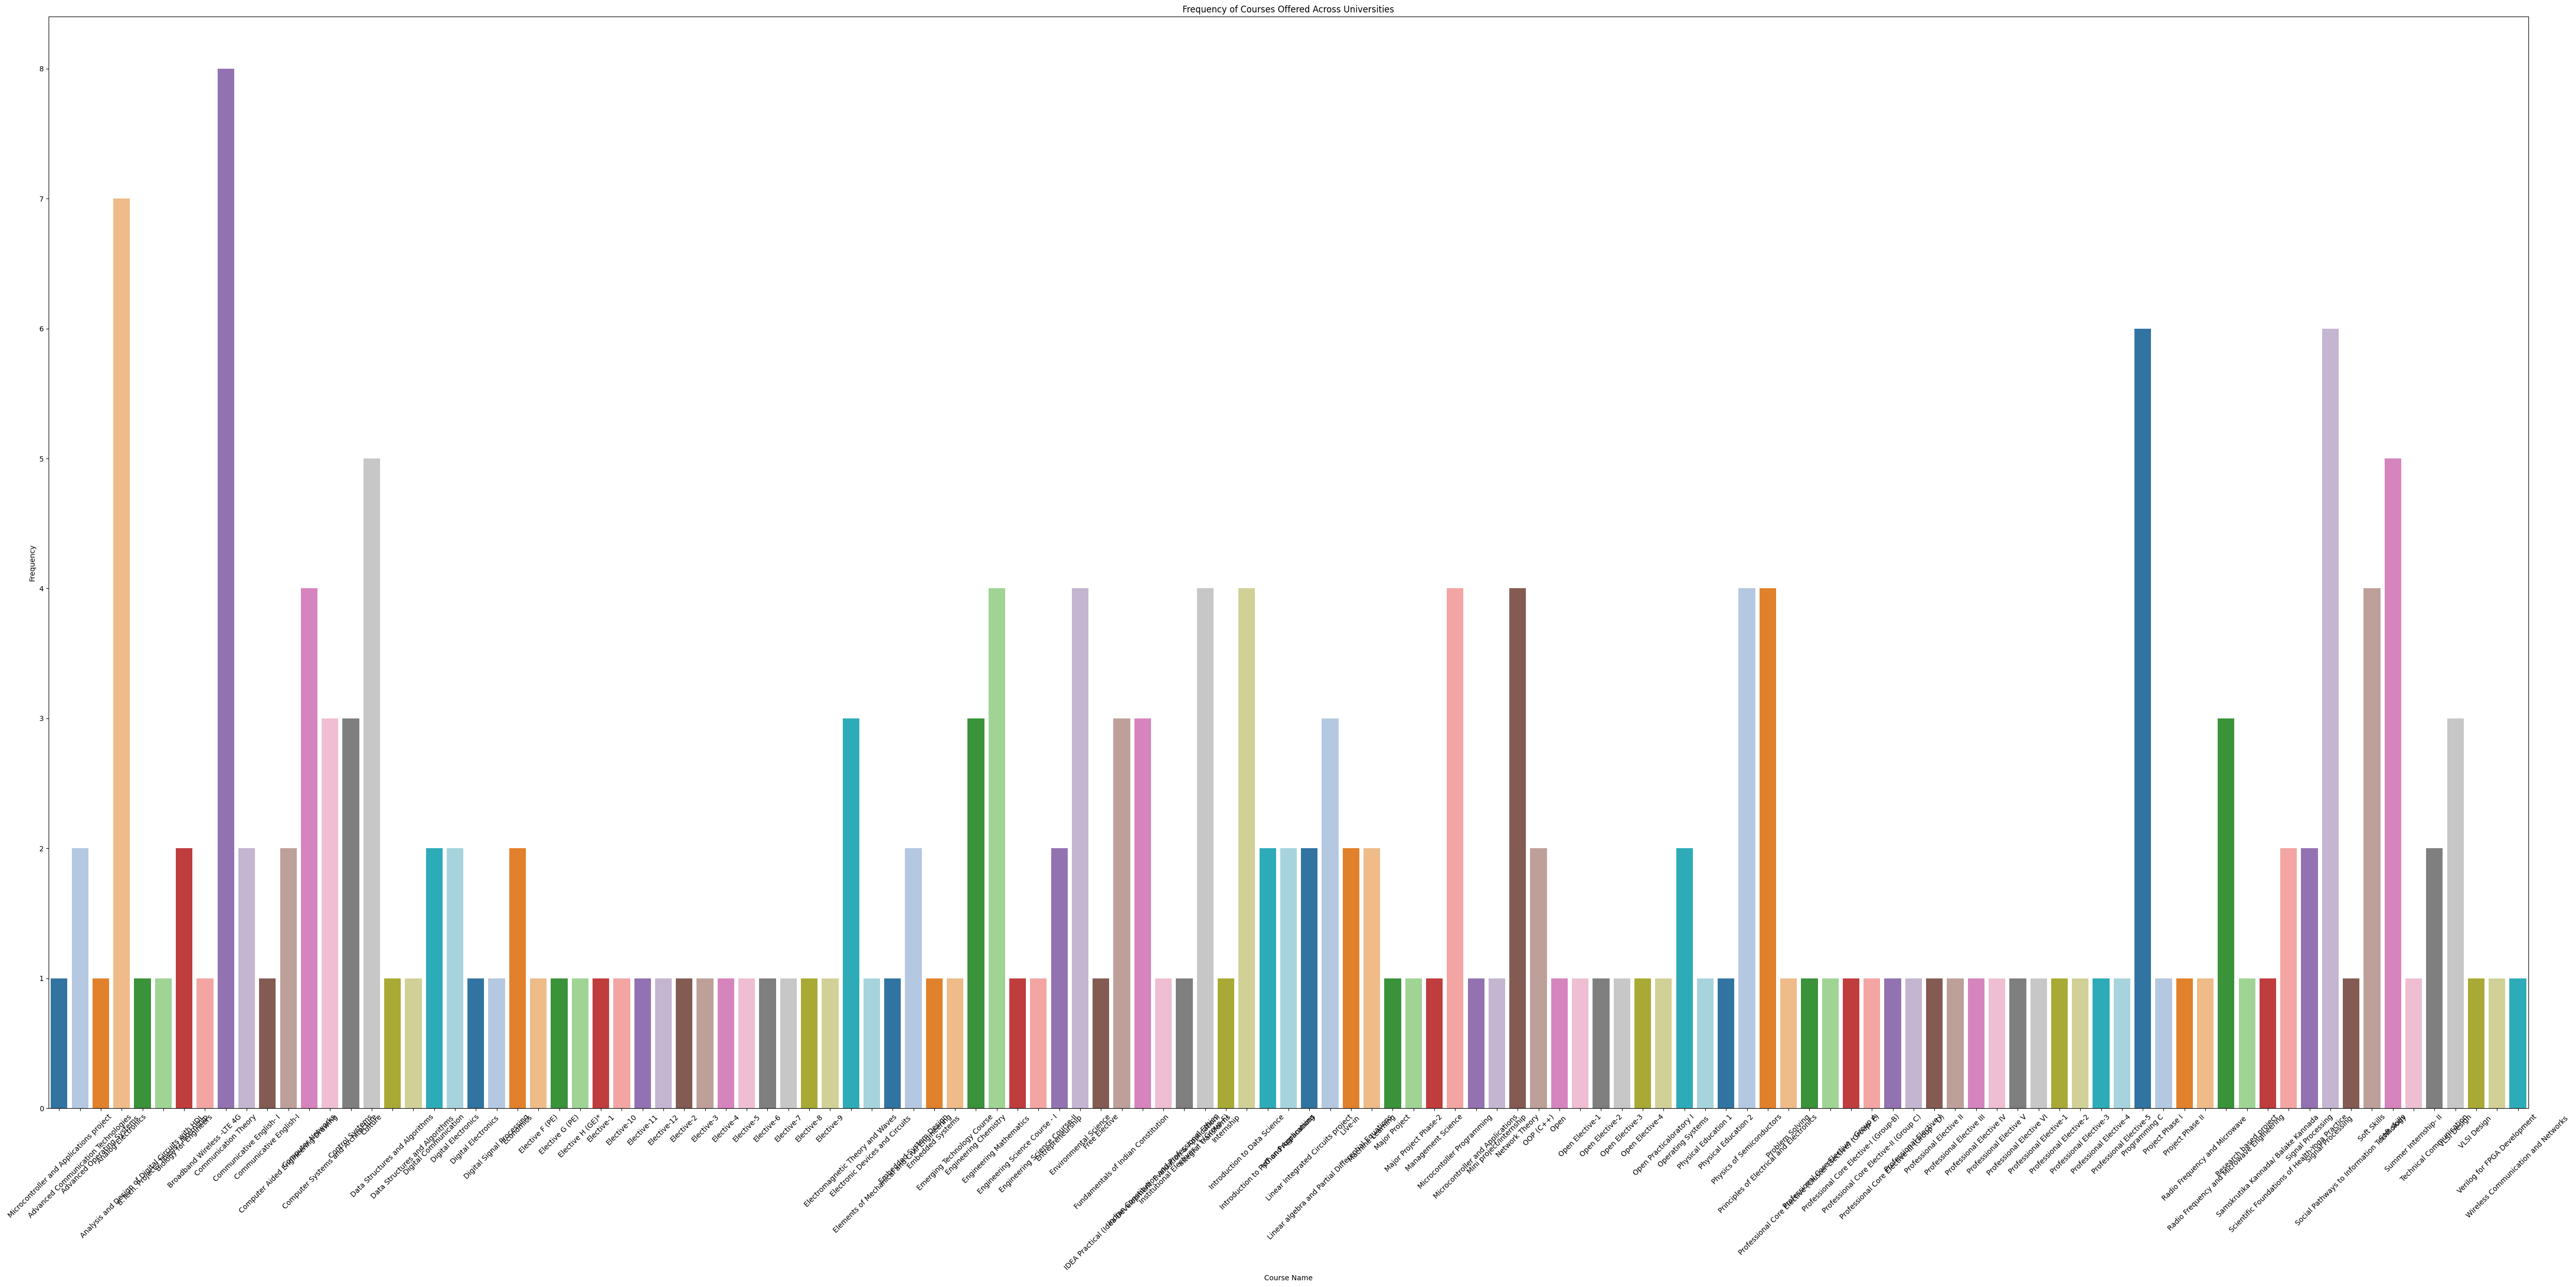

In [ ]:
# Count frequency of each course across universities
course_frequency = data.groupby('Subject').size().reset_index(name='frequency')

# Plotting course frequency with distinct colors for each bar
plt.figure(figsize=(50, 25))
palette = sns.color_palette("tab20", len(course_frequency))  # Using "tab20" for distinct, non-gradient colors
sns.barplot(data=course_frequency, x='Subject', y='frequency', palette=palette)

plt.title('Frequency of Courses Offered Across Universities')
plt.xlabel('Course Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Unique Courses by Semester

<ipython-input-10-e5601c6441dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_courses_per_semester, x='Sem', y='Subject', palette=palette)


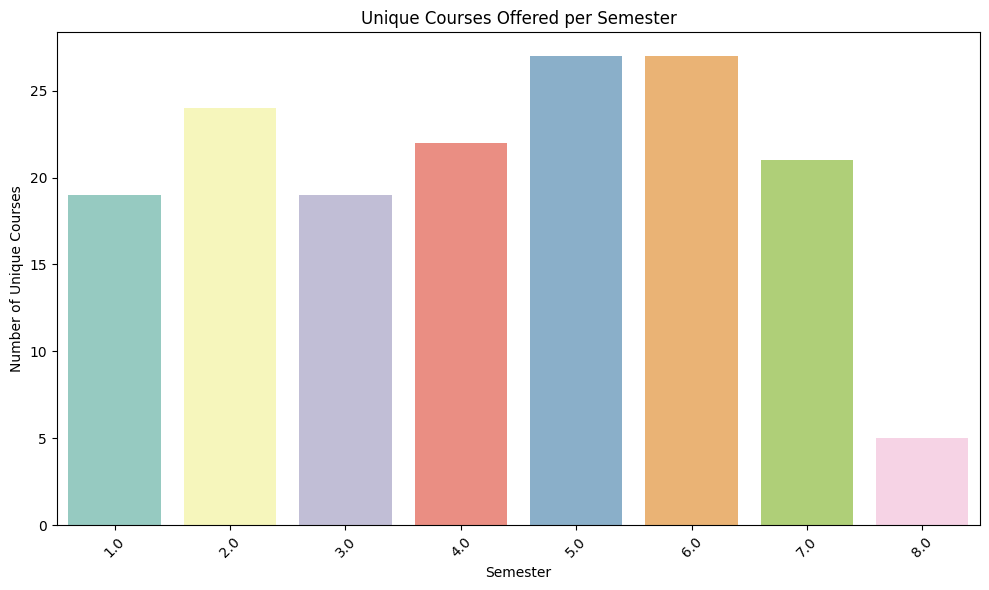

In [ ]:
# Count unique courses offered each semester
unique_courses_per_semester = data.groupby('Sem')['Subject'].nunique().reset_index()

# Plotting unique courses per semester with distinct colors
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set3", len(unique_courses_per_semester))  # Using "Set3" for distinct colors without gradients
sns.barplot(data=unique_courses_per_semester, x='Sem', y='Subject', palette=palette)

plt.title('Unique Courses Offered per Semester')
plt.xlabel('Semester')
plt.ylabel('Number of Unique Courses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Yearly Course Trends

<ipython-input-11-ae3b6db12ce8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_course_count, x='year', y='Subject', palette=palette)


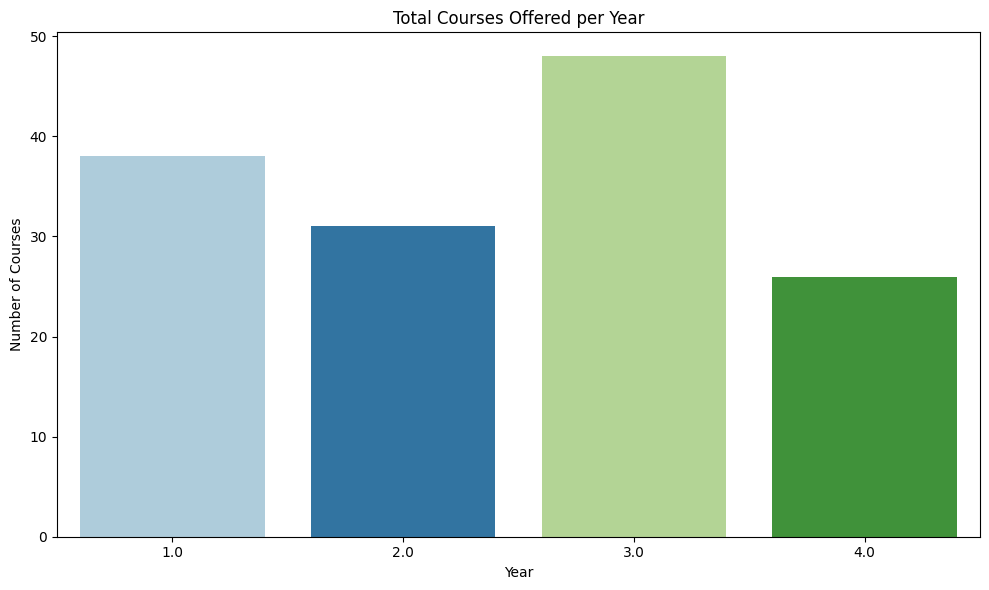

In [ ]:
# Count total courses offered per year
yearly_course_count = data.groupby('year')['Subject'].nunique().reset_index()

# Plotting yearly course trends with distinct colors
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Paired", len(yearly_course_count))  # Using "Paired" for distinct colors
sns.barplot(data=yearly_course_count, x='year', y='Subject', palette=palette)

plt.title('Total Courses Offered per Year')
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.tight_layout()
plt.show()


Elective vs. Core Ratio

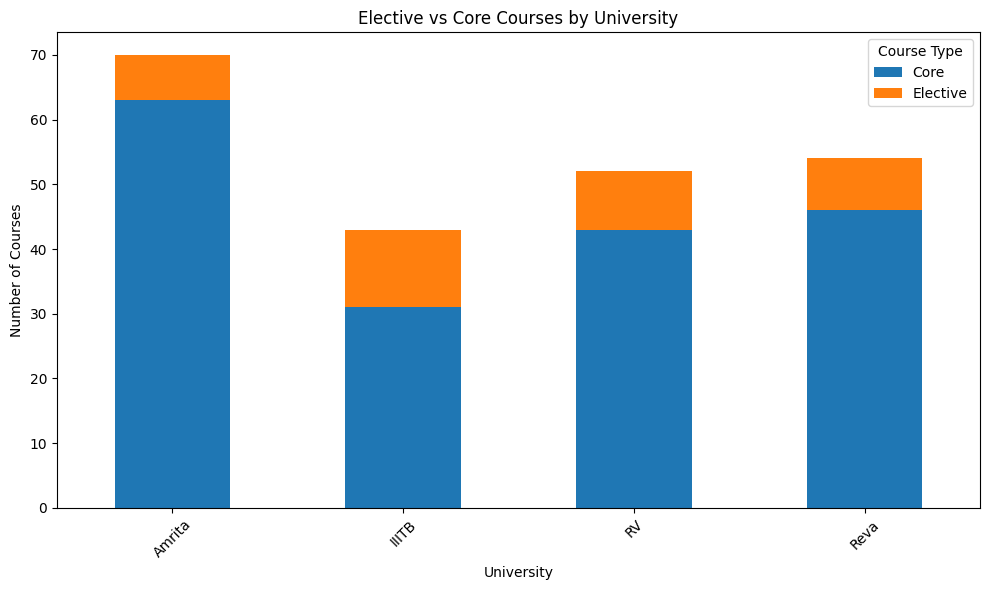

In [ ]:
# Remove spaces from 'Core/Prof Elective' column
data['Core/Prof Elective'] = data['Core/Prof Elective'].str.strip()

# Count elective and core courses
elective_core_ratio = data.groupby('Offered by')['Core/Prof Elective'].value_counts().unstack().fillna(0)

# Plotting the elective vs core ratio with distinct colors
ax = elective_core_ratio.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])  # Distinct colors for core and elective

plt.title('Elective vs Core Courses by University')
plt.xlabel('University')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.legend(title='Course Type')
plt.tight_layout()
plt.show()


Word Cloud

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud for course names
text = ' '.join(data['Subject'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Course Name Word Cloud')
plt.show()

TypeError: sequence item 7: expected str instance, float found

Heatmap of Course Offerings

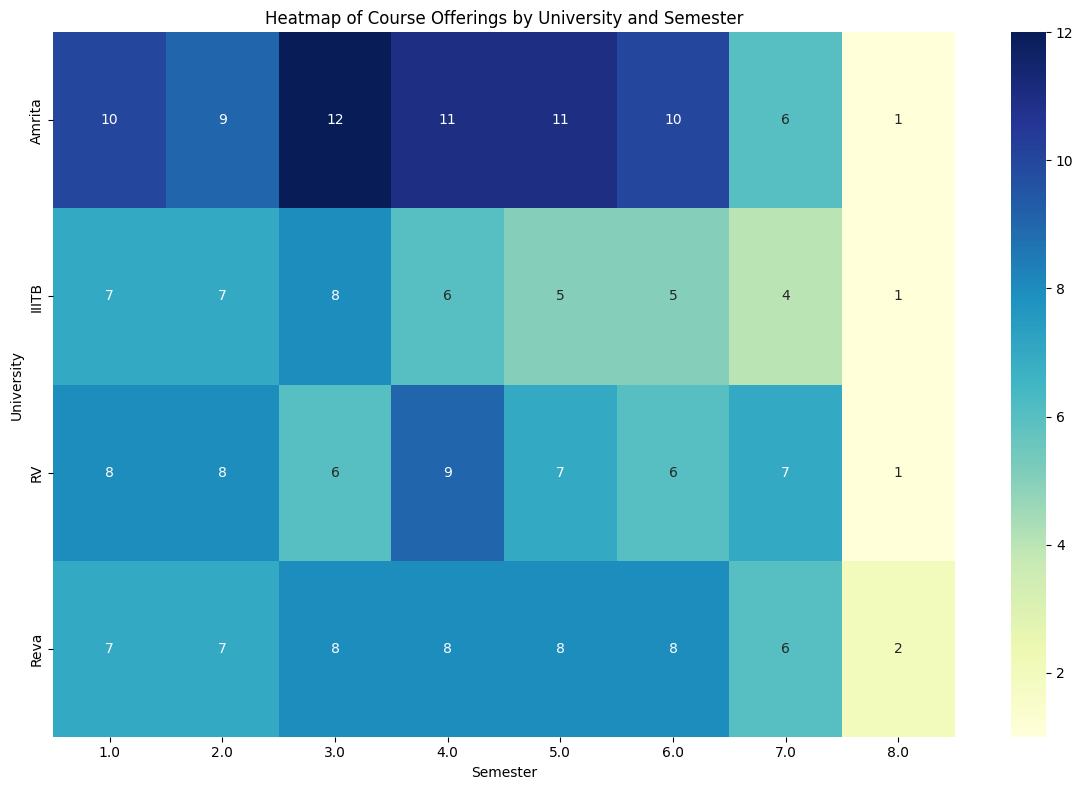

In [ ]:
# Count courses offered by university and semester
heatmap_data = data.groupby(['Offered by', 'Sem']).size().unstack(fill_value=0)
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Course Offerings by University and Semester')
plt.xlabel('Semester')
plt.ylabel('University')
plt.tight_layout()
plt.show()

Box Plot of Course Credits

<ipython-input-15-b3e808042b5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Offered by', y='Credit Points', palette="Set2")  # Using "Set2" for distinct colors


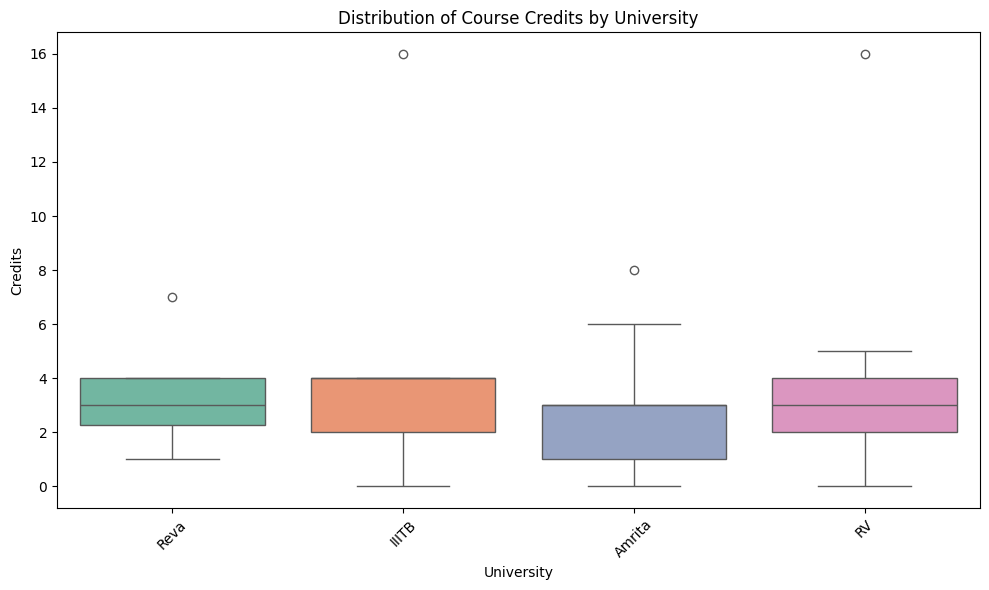

In [ ]:
# Box plot for course credits by university with distinct colors
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Offered by', y='Credit Points', palette="Set2")  # Using "Set2" for distinct colors

plt.title('Distribution of Course Credits by University')
plt.xlabel('University')
plt.ylabel('Credits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pivot Table for Summarization

In [ ]:
# Creating a pivot table
pivot_table = pd.pivot_table(data, index='Offered by', columns='Sem', values='Subject', aggfunc='nunique', fill_value=0)
# Displaying the pivot table
print(pivot_table)

Sem         1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0
Offered by                                        
Amrita        8    9   10    8   11   10    6    1
IIITB         7    7    8    6    5    5    4    1
RV            8    8    6    9    7    6    7    1
Reva          7    7    7    8    8    8    5    2


K-Means


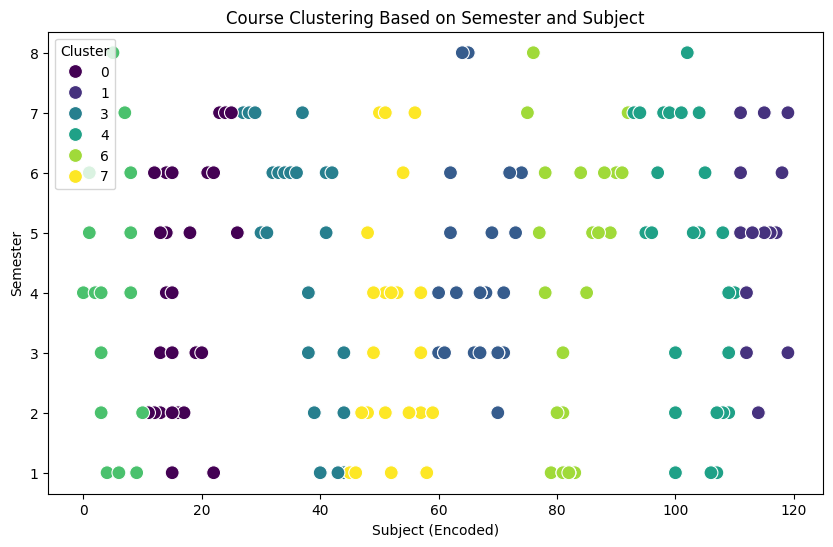

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Label encode the 'Subject' column (since it's categorical)
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])

# One-hot encode the 'Sem' column
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
sem_encoded = encoder.fit_transform(data[['Sem']])

# Convert encoded 'Sem' column into a DataFrame with appropriate column names
sem_encoded_df = pd.DataFrame(sem_encoded, columns=encoder.get_feature_names_out(['Sem']))
# Drop rows with missing values in the columns used for clustering
X = pd.concat([data[['Subject_encoded']], sem_encoded_df], axis=1).dropna()

# Fit KMeans with 6 clusters
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

# Create a new DataFrame for clustering results with original indices
data['cluster'] = None  # Initialize cluster column with None
data.loc[X.index, 'cluster'] = kmeans.labels_  # Assign labels only to the corresponding indices

# Plot Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Subject_encoded', y='Sem', hue='cluster', palette='viridis', s=100)
plt.title('Course Clustering Based on Semester and Subject')
plt.xlabel('Subject (Encoded)')
plt.ylabel('Semester')
plt.legend(title='Cluster')
plt.show()


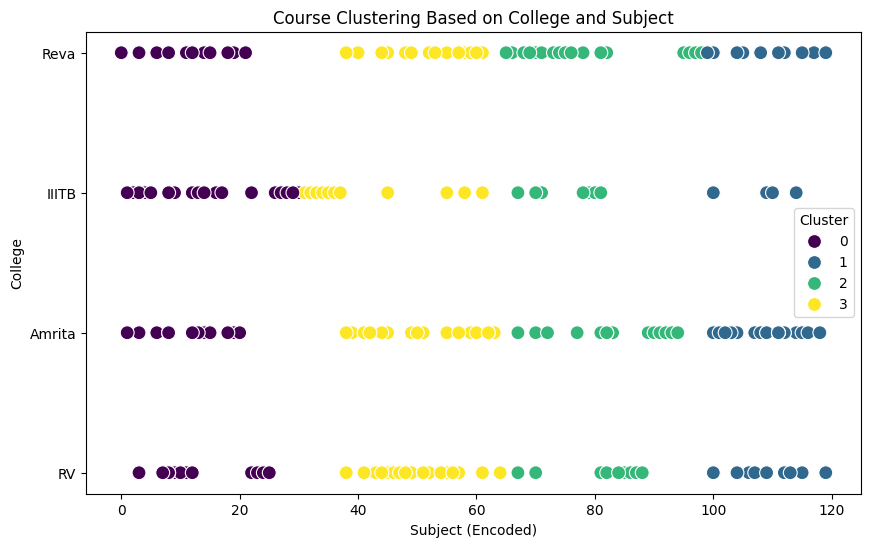

In [ ]:
# Label encode the 'Subject' column (since it's categorical)
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])

# One-hot encode the 'College' column (replace 'Offered by' with your actual column name for College)
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
college_encoded = encoder.fit_transform(data[['Offered by']])  # Assuming 'Offered by' is the college column

# Convert encoded 'College' column into a DataFrame with appropriate column names
college_encoded_df = pd.DataFrame(college_encoded, columns=encoder.get_feature_names_out(['Offered by']))

# Concatenate 'Subject_encoded' and 'College' one-hot encoded columns for clustering
X = pd.concat([data[['Subject_encoded']], college_encoded_df], axis=1)

# Drop rows with missing values in X
X = X.dropna()

# Fit KMeans with 6 clusters (or change the number of clusters as needed)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Assign cluster labels to the original dataset
data['cluster'] = None  # Initialize cluster column with None
data.loc[X.index, 'cluster'] = kmeans.labels_  # Assign labels only to the corresponding indices

# Plot Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Subject_encoded', y='Offered by', hue='cluster', palette='viridis', s=100)
plt.title('Course Clustering Based on College and Subject')
plt.xlabel('Subject (Encoded)')
plt.ylabel('College')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Count the unique subjects
unique_subject_count = data['Subject'].nunique()

print(f"Number of unique subjects: {unique_subject_count}")

Number of unique subjects: 119


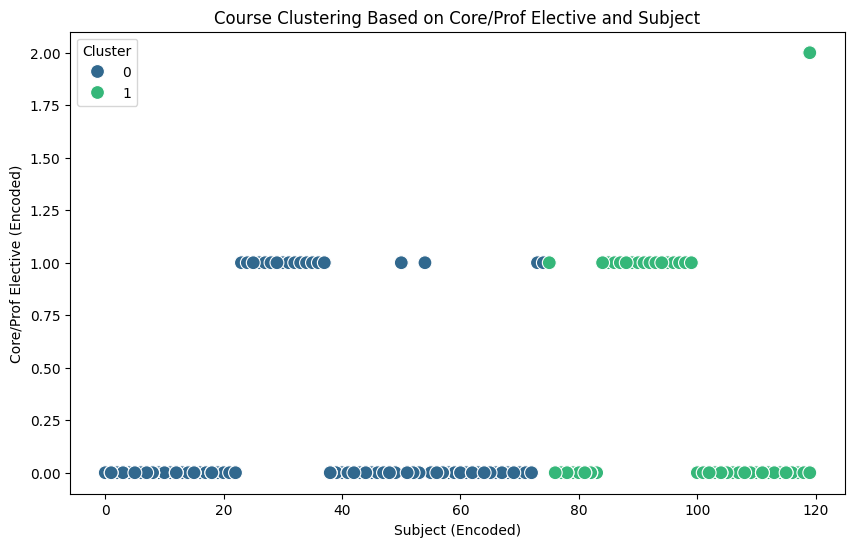

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Label encode the 'Subject' and 'Core/Prof Elective' columns (if categorical)
label_encoder_subject = LabelEncoder()
label_encoder_core = LabelEncoder()

# Encode the 'Subject' column
data['Subject_encoded'] = label_encoder_subject.fit_transform(data['Subject'])

# Encode the 'Core/Prof Elective' column
data['Core/Prof Elective_encoded'] = label_encoder_core.fit_transform(data['Core/Prof Elective'].astype(str))

# Use 'Core/Prof Elective_encoded' and 'Subject_encoded' for clustering
X = pd.concat([data[['Core/Prof Elective_encoded']], data[['Subject_encoded']]], axis=1).dropna()

# Fit KMeans with 6 clusters (or change the number of clusters as needed)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X[['Subject_encoded']])  # Only clustering on 'Subject_encoded'

# Assign cluster labels to the original dataset
data['cluster'] = None  # Initialize cluster column with None
data.loc[X.index, 'cluster'] = kmeans.labels_  # Assign labels only to the corresponding indices

# Plot Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Subject_encoded', y='Core/Prof Elective_encoded', hue='cluster', palette='viridis', s=100)
plt.title('Course Clustering Based on Core/Prof Elective and Subject')
plt.xlabel('Subject (Encoded)')
plt.ylabel('Core/Prof Elective (Encoded)')
plt.legend(title='Cluster')
plt.show()
